In [1]:
#This code uses simulation results in ../outputs/PQNtest/ folder and plots Figure 2 and Supplemetnary Figures 1-7.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import pandas as pd
import psutil
import csv
import pickle
from matplotlib import gridspec
cmap = plt.get_cmap("tab10")
cmap1 = plt.get_cmap("tab20b")

In [3]:
import pickle
def readdata(filename):
    f = open(filename,"rb")
    gw0 = pickle.load(f)
    return gw0
name="../outputs/PQNtest/"
x0=readdata(name+"gt0.txt")
y=[]
for i in range(9):
    y.append(readdata(name+"gw"+str(i)+".txt"))

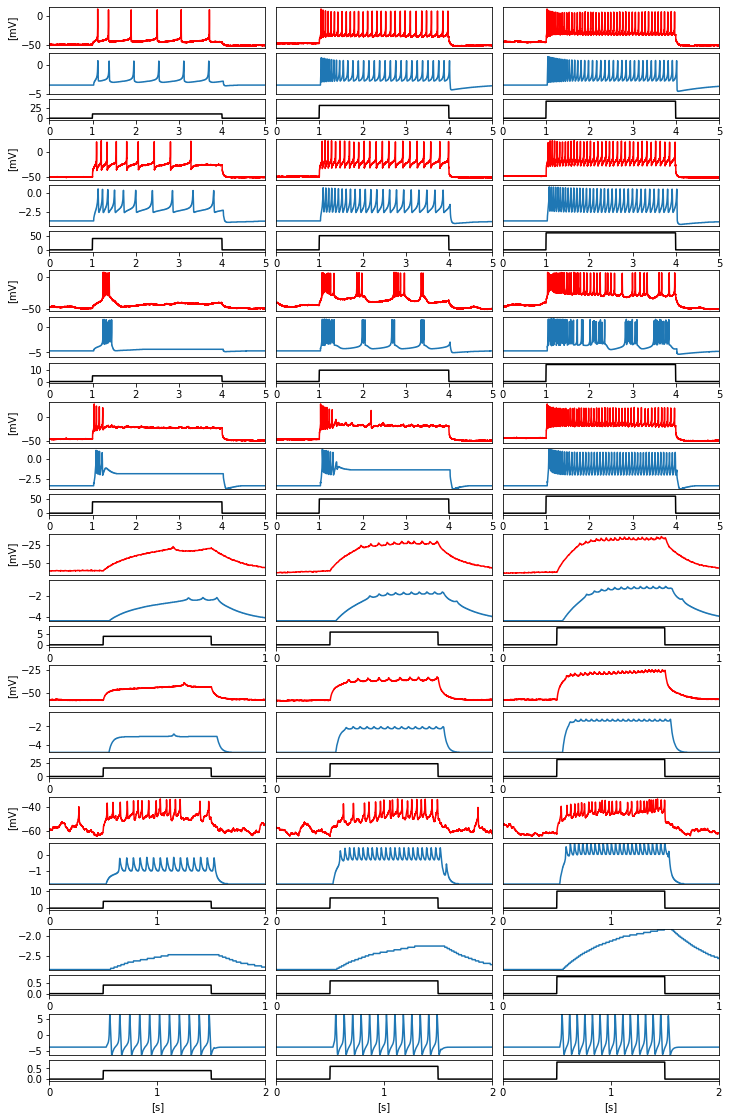

In [4]:
def print_txt(l0,f0):
    with open(f0, "w") as f:
        for item in l0:
            f.write("%s\n" % item)
def plot_wave_PQN(axs,gt,gw,w0,w1,name,l0=[0,1,2]):
    jitter=-0.024
    for i,k in enumerate(l0):
        at=[]
        av=[]
        xstart=10+k*8-w0
        xend=10+k*8+w0+w1
        for j,t in enumerate(gt):
            if (t>=xstart and t<xend):
                at.append(t)
                av.append(gw[j])
        axs[i].plot(at,av)
        axs[i].set_xlim(xstart,xend)
        axs[i].set_ylim(min(gw),max(gw))
        axs[i].axes.xaxis.set_ticks([])
        if i!=0:
             axs[i].axes.yaxis.set_ticks([])
        print_txt(at,"../outputs/FigSourceData/Fig2insilico"+name+"_"+str(i)+"_t.txt")
        print_txt(av,"../outputs/FigSourceData/Fig2insilico"+name+"_"+str(i)+"_v.txt")
def plot_wave_seki(ax,name,txtname,label_flag=0):
    df = pd.read_csv("../invivo_results/LN/"+name)
    na = df.values
    ax.plot(np.arange(0,len(na.T[0])*0.0001,0.0001),list(map(lambda x: x*1000, na.T[0])),color="red")
    ax.set_xlim(0,5)
    ax.axes.xaxis.set_ticks([])
    if label_flag==1:
        ax.set_ylabel("[mV]")
    else:
        ax.axes.yaxis.set_ticks([])
    print_txt(np.arange(0,len(na.T[0])*0.0001,0.0001),"../outputs/FigSourceData/Fig2invivo"+txtname+"_t.txt")
    print_txt(list(map(lambda x: x*1000, na.T[0])),"../outputs/FigSourceData/Fig2invivo"+txtname+"_v.txt")
def plot_wave_PN(axs,name,w,ymin,ymax):
    t0x=[];t0y=[];c0=0;f0=0
    with open("../invivo_results/PN/"+name,"r") as f:
        s = f.readlines()
        for r in s:
            try:
                t0y.append(float(r))
                t0x.append(c0*0.0001)
                c0+=1
                if c0*0.0001>4 and float(r)>-55 and f0==0:
                    t0=c0*0.0001-0.03-w+0.25
                    f0=1
            except ValueError:
                print(r)
    t1x=[];t1y=[];c1=0
    for i, x in enumerate(t0x):
        if x>t0-0.5:
            t1x.append(c1*0.0001)
            t1y.append(t0y[i])
            c1+=1
    for k in range(3):
        axs[k].set_xlim(0,1)
        axs[k].set_ylim(ymin,ymax)
        axs[k].set_xticks(np.arange(0, 1, 0.25))
        axs[k].plot(list(map(lambda x:x-4*(k+1)+2, t1x)),t1y,color="red")
        axs[k].axes.xaxis.set_ticks([])
        if k==0:
            axs[k].set_ylabel("[mV]")
        else:
            axs[k].axes.yaxis.set_ticks([])
        print_txt(list(map(lambda x:x-4*(k+1)+2, t1x)),"../outputs/FigSourceData/Fig2invivoPN_"+str(k)+"_t.txt")
        print_txt(t1y,"../outputs/FigSourceData/Fig2invivoPN_"+str(k)+"_v.txt")  
def plot_wave_KC(axs,name,w,ymin,ymax):
    t0x=[];t0y=[];c0=0;f0=0
    with open("../invivo_results/KC/"+name,"r") as f:
        s = f.readlines()
        for r in s:
            try:
                t0y.append(float(r))
                t0x.append(c0*0.0001)
                c0+=1
                if c0*0.0001>4 and float(r)>-55 and f0==0:
                    t0=c0*0.0001-0.03-w+0.25
                    f0=1
            except ValueError:
                print(r)
    t1x=[];t1y=[];c1=0
    for i, x in enumerate(t0x):
        if x>t0-0.5:
            t1x.append(c1*0.0001)
            t1y.append(t0y[i])
            c1+=1
    for k in range(3):
        axs[k].set_xlim(0,1)
        axs[k].set_ylim(ymin,ymax)
        axs[k].set_xticks(np.arange(0, 1, 0.25))
        axs[k].plot(list(map(lambda x:x-4*(k+1)+2, t1x)),t1y,color="red")
        axs[k].axes.xaxis.set_ticks([])
        if k==0:
            axs[k].set_ylabel("[mV]")
        else:
            axs[k].axes.yaxis.set_ticks([])
        print_txt(list(map(lambda x:x-4*(k+1)+2, t1x)),"../outputs/FigSourceData/Fig2invivoKC_"+str(k)+"_t.txt")
        print_txt(t1y,"../outputs/FigSourceData/Fig2invivoKC_"+str(k)+"_v.txt")
def plot_wave_MBON(axs):
    n0=pd.read_csv("../invivo_results/MBON/MBONa1_step_V.csv",header=None)
    axs[0].plot(np.arange(0, 2,2.0/len(n0.T[1])),n0.T[1],color="red")
    axs[0].set_xlim(0,2)
    axs[0].axes.xaxis.set_ticks([])
    axs[0].set_ylabel("[mV]")
    axs[1].plot(np.arange(0, 2,2.0/len(n0.T[2])),n0.T[2],color="red")
    axs[1].set_xlim(0,2)
    axs[1].axes.xaxis.set_ticks([])
    axs[1].axes.yaxis.set_ticks([])
    axs[2].plot(np.arange(0, 2,2.0/len(n0.T[4])),n0.T[4],color="red")
    axs[2].set_xlim(0,2)
    axs[2].axes.xaxis.set_ticks([])
    axs[2].axes.yaxis.set_ticks([])
    print_txt(np.arange(0, 2,2.0/len(n0.T[1])),"../outputs/FigSourceData/Fig2invivoMBON_0_t.txt")
    print_txt(n0.T[1],"../outputs/FigSourceData/Fig2invivoMBON_0_v.txt")
    print_txt(np.arange(0, 2,2.0/len(n0.T[2])),"../outputs/FigSourceData/Fig2invivoMBON_1_t.txt")
    print_txt(n0.T[2],"../outputs/FigSourceData/Fig2invivoMBON_1_v.txt")
    print_txt(np.arange(0, 2,2.0/len(n0.T[4])),"../outputs/FigSourceData/Fig2invivoMBON_2_t.txt")
    print_txt(n0.T[4],"../outputs/FigSourceData/Fig2invivoMBON_2_v.txt")
def plot_input(axs,h,tmax,tstart,tend,xtics_mode=0):
    for i in range(3):
        a0=[]
        for t in np.arange(0, tmax, tmax*0.001):
            if t>=tstart and t<tend:
                a0.append(h[i])
            else:
                a0.append(0)
        axs[i].set_xlim(0,tmax)
        axs[i].set_ylim(-h[2]*0.1,h[2]*1.1)
        axs[i].plot(np.arange(0, tmax, tmax*0.001),a0,color="black")
        if i!=0:
            axs[i].axes.yaxis.set_ticks([])
        if xtics_mode==1:
            axs[i].set_xticks([0,1])
        if xtics_mode==2:
            axs[i].set_xticks([0,1,2])
        if xtics_mode==3:
            axs[i].set_xticks([0,1,2])
            axs[i].set_xlabel("[s]")
h0=1
h1=0.5
h2=0.2
l0=[]
for i in range(7):
    l0.append(h0)
    l0.append(h0)
    l0.append(h1)
    l0.append(h2)
for i in range(2):
    l0.append(h0)
    l0.append(h1)
    l0.append(h2)
fig, axis= plt.subplots(34,3,figsize=(12, 20),gridspec_kw=dict(height_ratios=l0,wspace=0.05, hspace=0.2))
for k in range(3):
    for i in range(7):
        axis[3+i*4][k].axis("off")
    axis[30][k].axis("off")
    axis[33][k].axis("off")
I0=[0,10,20,30,40,50,60,70]
I1=[30,40,50,60,70,80,90,90]
I2=[0,5,10,15,20,25,30,35]
I3=[20,30,40,50,60,70,80,90]
I4=[3,4,5,6,7,8,9,10]
I5=[12,16,20,24,28,32,40,46]
I6=[2,4,6,8,10]
plot_wave_PQN([axis[1][0],axis[1][1],axis[1][2]],x0,y[0],1,3,"LN0",l0=[1,3,4])
plot_wave_PQN([axis[5][0],axis[5][1],axis[5][2]],x0,y[1],1,3,"LN1",l0=[1,2,3])
plot_wave_PQN([axis[9][0],axis[9][1],axis[9][2]],x0,y[2],1,3,"LN2",l0=[1,2,3])
plot_wave_PQN([axis[13][0],axis[13][1],axis[13][2]],x0,y[3],1,3,"LN3",l0=[2,3,4])
plot_wave_PQN([axis[17][0],axis[17][1],axis[17][2]],x0,y[4],0.25,0.5,"PN",l0=[1,3,5])
plot_wave_PQN([axis[21][0],axis[21][1],axis[21][2]],x0,y[5],0.25,0.5,"KC",l0=[1,3,5])
plot_wave_PQN([axis[25][0],axis[25][1],axis[25][2]],x0,y[6],0.5,1,"MBON",l0=[1,3,4])
plot_wave_PQN([axis[28][0],axis[28][1],axis[28][2]],x0,y[7],0.25,0.5,"APL")
plot_wave_PQN([axis[31][0],axis[31][1],axis[31][2]],x0,y[8],0.5,1,"SMP")

plot_input([axis[2][0],axis[2][1],axis[2][2]],[10,30,40],5,1,4)
plot_input([axis[6][0],axis[6][1],axis[6][2]],[40,50,60],5,1,4)
plot_input([axis[10][0],axis[10][1],axis[10][2]],[5,10,15],5,1,4)
plot_input([axis[14][0],axis[14][1],axis[14][2]],[40,50,60],5,1,4)
plot_input([axis[18][0],axis[18][1],axis[18][2]],[4,6,8],1,0.25,0.75,xtics_mode=1)
plot_input([axis[22][0],axis[22][1],axis[22][2]],[16,24,32],1,0.25,0.75,xtics_mode=1)
plot_input([axis[26][0],axis[26][1],axis[26][2]],[4,6,10],2,0.5,1.5,xtics_mode=2)
plot_input([axis[29][0],axis[29][1],axis[29][2]],[0.4,0.6,0.8],1,0.25,0.75,xtics_mode=1)
plot_input([axis[32][0],axis[32][1],axis[32][2]],[0.4,0.6,0.8],2,0.5,1.5,xtics_mode=3)

plot_wave_seki(axis[0][0],"W081115b_1_7_2_1.txt","LN0_0",label_flag=1)
plot_wave_seki(axis[0][1],"W081115b_1_7_4_1.txt","LN0_1")
plot_wave_seki(axis[0][2],"W081115b_1_7_5_1.txt","LN0_2")
plot_wave_seki(axis[4][0],"W081023a_1_8_5_1.txt","LN1_0",label_flag=1)
plot_wave_seki(axis[4][1],"W081023a_1_8_6_1.txt","LN1_1")
plot_wave_seki(axis[4][2],"W081023a_1_8_7_1.txt","LN1_2")
plot_wave_seki(axis[8][0],"W081009a_1_9_2_1.txt","LN2_0",label_flag=1)
plot_wave_seki(axis[8][1],"W081009a_1_9_3_1.txt","LN2_1")
plot_wave_seki(axis[8][2],"W081009a_1_9_4_1.txt","LN2_2")
plot_wave_seki(axis[12][0],"W081006a_1_6_5_1.txt","LN3_0",label_flag=1)
plot_wave_seki(axis[12][1],"W081006a_1_6_6_1.txt","LN3_1")
plot_wave_seki(axis[12][2],"W081006a_1_6_7_1.txt","LN3_2")
plot_wave_PN([axis[16][0],axis[16][1],axis[16][2]],"PN_160310_5_03_v.txt",0.0235,-65,-10)
plot_wave_KC([axis[20][0],axis[20][1],axis[20][2]],"KC_181016_4_00_v.txt",-0.022,-65,-20)
plot_wave_MBON([axis[24][0],axis[24][1],axis[24][2]])

plt.savefig("../outputs/figs/waveforms.svg", format="svg",dpi=1200)
plt.show()



C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


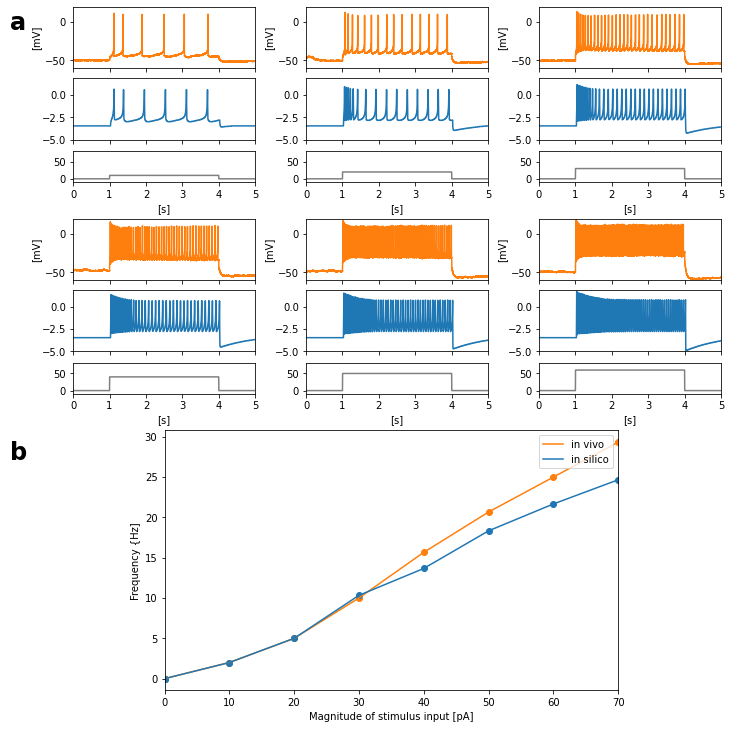

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


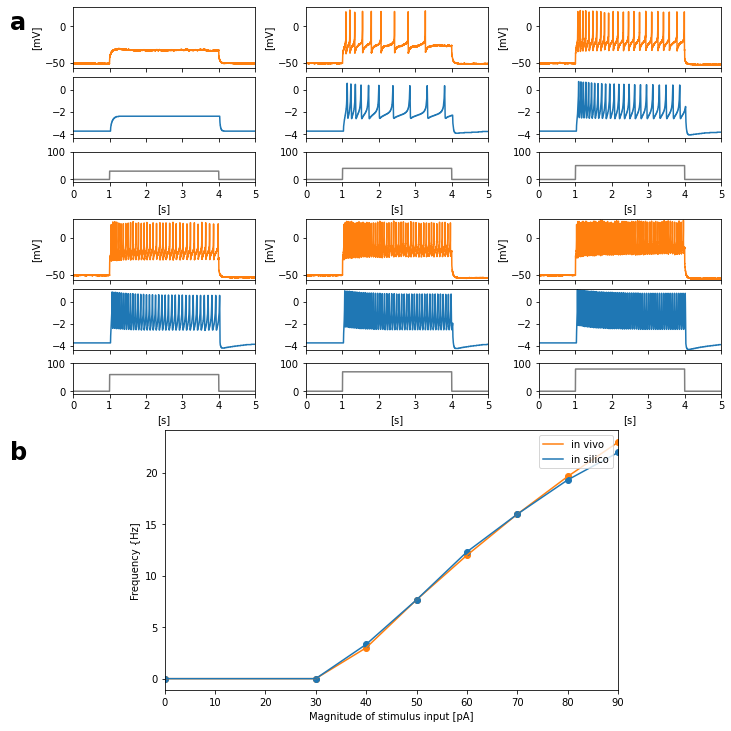

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


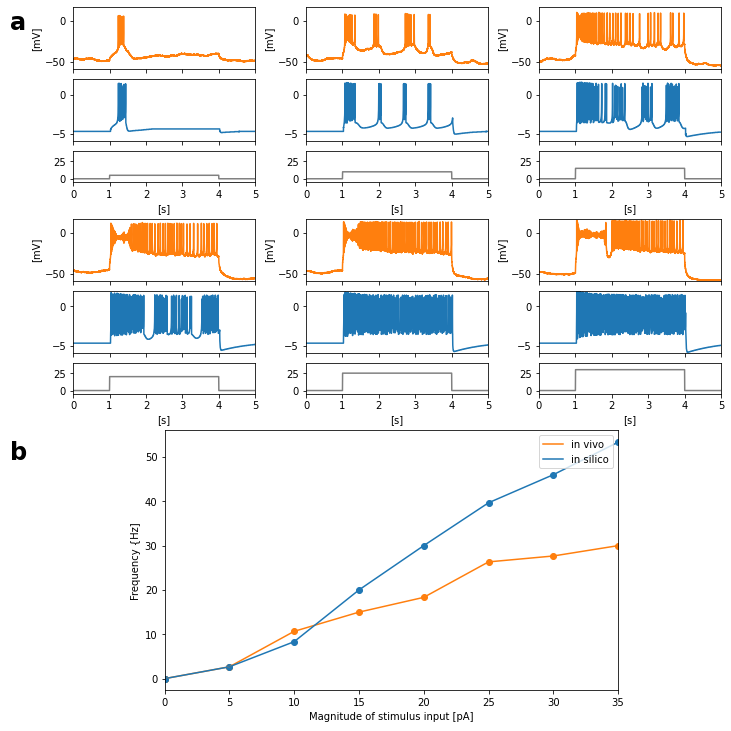

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


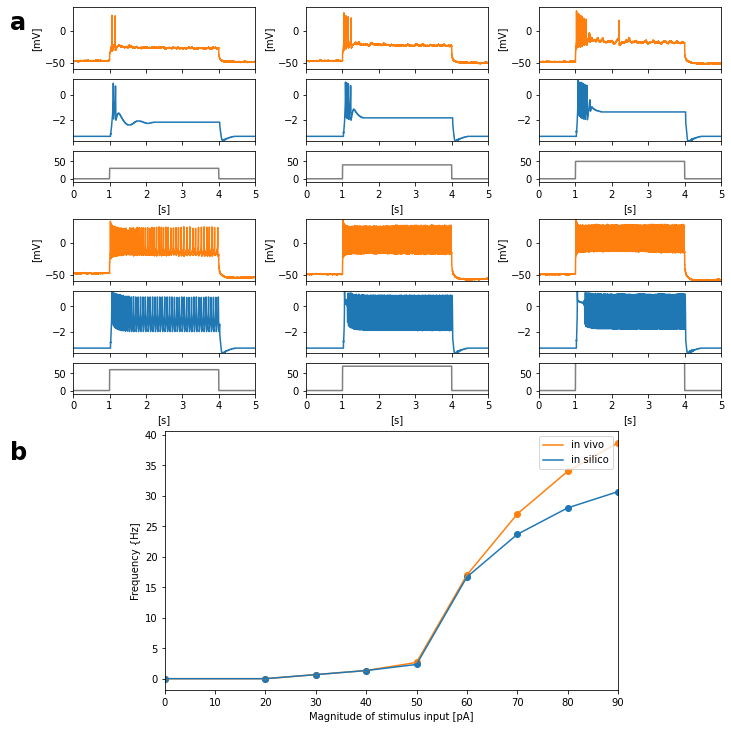

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


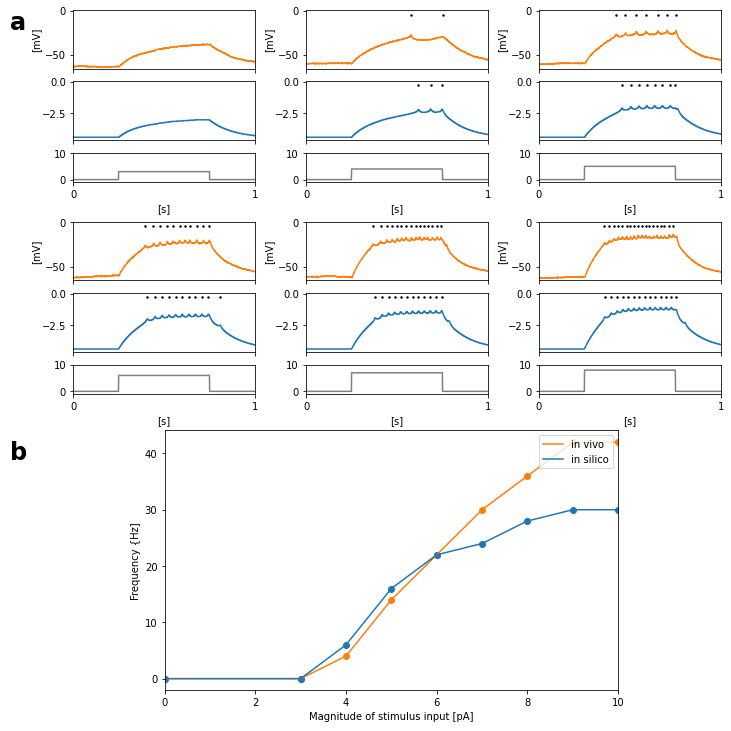

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


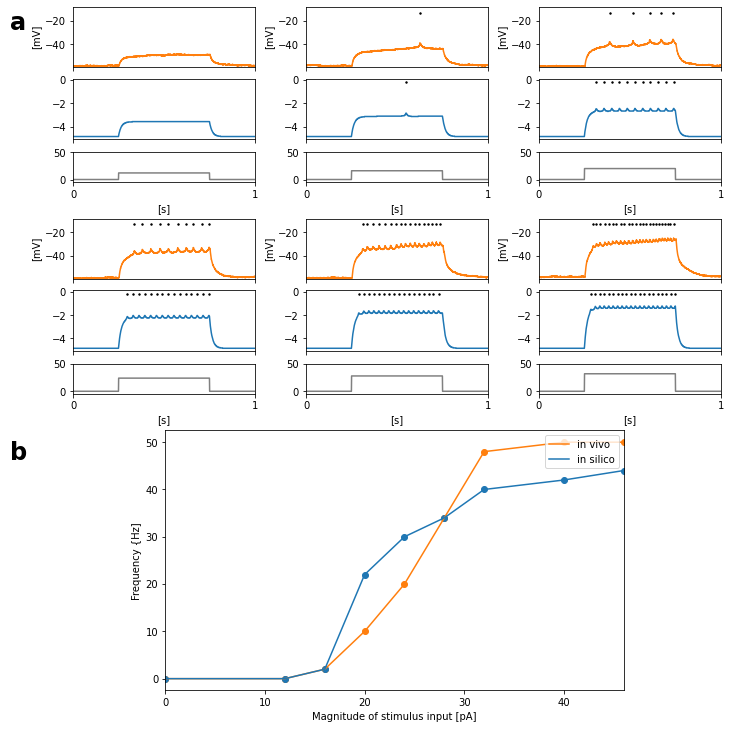

C:\Users\nanami\AppData\Local\Temp/ipykernel_17284/3521436853.py:300: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("../outputs/figs/"+name+".svg")
C:\Users\nanami\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


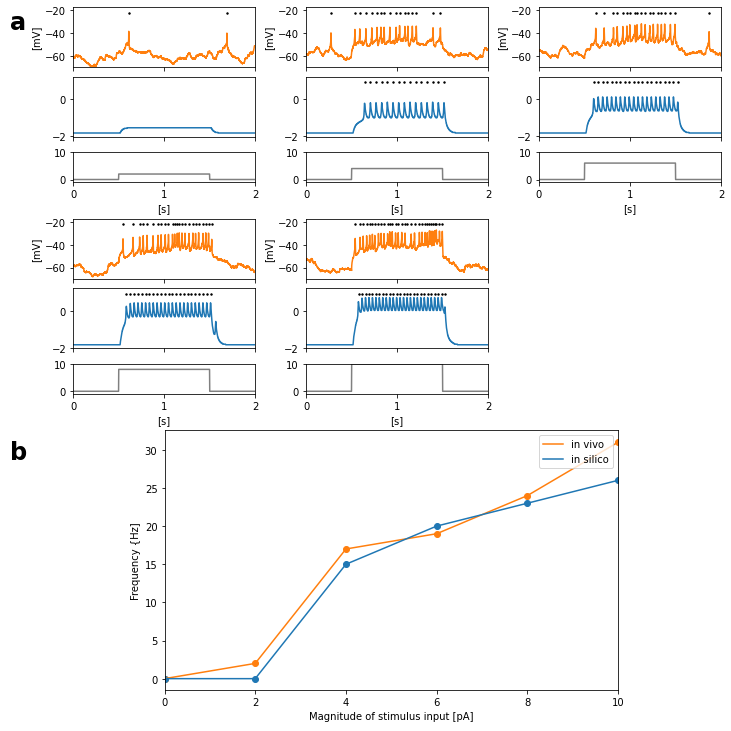

In [5]:
def measuring_spike_timings_unipolar(t0,line,width_smooth=30,vth=-3,interval=5):
    v0=0
    v1=0
    v2=0
    f0=0
    c0=100
    st0=[]
    line2=[]
    if 1:
        for j,x in enumerate(line):
            vmax=-0
            if j>width_smooth/2 and j<len(line)-width_smooth/2:
                vmax=-100
                for k in range(width_smooth):
                    if line[int(j-width_smooth/2+k)]>vmax:
                        vmax=line[int(j-width_smooth/2+k)]
            line2.append(vmax)
    if 1:
        for j,x in enumerate(line):
            v2=v1
            v1=v0
            v0=x
            if c0>=1:
                c0=c0-1
            if j>0:
                if  v1==line2[j-1] and x>vth and c0==0 and j>10 and j<len(line)-5:
                    c0=interval
                    st0.append(t0[j])
                    f0=0
    return st0
def measuring_spike_timings(t,v,vth):
    s=[]
    x_old=100
    for i,x in enumerate(v):
        if x_old<vth and x>=vth and t[i]>0:
            s.append(t[i])
        x_old=x
    return s
def measuring_spike_intervals(s0):
    s1=[]
    for i,s in enumerate(s0):
        if i>0:
            s1.append(s0[i]-s0[i-1])
    return list(map(lambda x: x+1, range(len(s1)))),s1
def measuring_Cv(s0):
    if len(s0)>0:
        save=sum(s0)/len(s0)
        c0=0
        for s in s0:
            c0+=(s-save)*(s-save)
        return math.sqrt(1.0/(len(s0)-1)*c0)/save
    else:
        return 0
def measuring_Lv(s0):
    if len(s0)>1:
        c0=0
        for i in range(len(s0)-1):
            c0+=3.0*(s0[i]-s0[i+1])*(s0[i]-s0[i+1])/(s0[i]+s0[i+1])/(s0[i]+s0[i+1])
        return 1.0/(len(s0)-1)*c0
    else:
        return 0
def measuring_bursting_properties(s0):
    bi=0
    bnum=0
    binterval=0
    last_bursting_spike_id=0
    for i,s in enumerate(s0):
        if i>1:
            if s0[i]-s0[i-1]>(s0[i-1]-s0[i-2])*3:
                if bi>0:
                    bnum=i-1-last_bursting_spike_id
                    binterval=s0[i]-s0[i-1]
                    break
                last_bursting_spike_id=i-1
                bi+=1
    return bnum,binterval
def match_initial0(t,v,Istart):
    vini=v[0]
    d0=0
    for i,x in enumerate(v):
        if x !=vini:
            d0=t[i]-Istart
            break
    t1=[]
    for t0 in t:
        t1.append(t0-d0)
    return t1
def plot_waveforms(name,s0,HH_t,HH_v,PQN_t,PQN_v,I_t,I_y,tmax,Imin,Imax,Cmin,Cmax,Pmin,Pmax,textflag=0,TMAX=5,MODE=0,CELL_ms_w=300,CELL_ms_th=-40,PQN_ms_w=30,PQN_ms_th=-3):
    tmax=TMAX
    spec = gridspec.GridSpec(ncols=1, nrows=3,figure=s0,hspace=-0.1, height_ratios=[1,1,0.5])
    ax0 = s0.add_subplot(spec[0])
    ax1 = s0.add_subplot(spec[1])
    ax2 = s0.add_subplot(spec[2])
    ax0.plot(HH_t,HH_v,color="C1")
    ax1.plot(PQN_t,PQN_v)
    ax2.plot(I_t,I_y,color="gray")
    ax0.set_xticks(np.arange(0,tmax+1,tmax/tmax))
    ax0.set_xlim(0,tmax)
    ax0.set_ylim(Cmin,Cmax)
    ax0.axes.xaxis.set_ticklabels([])
    ax0.set_ylabel("[mV]")
    if MODE>0:
        st0=measuring_spike_timings_unipolar(HH_t,HH_v,width_smooth=CELL_ms_w,vth=CELL_ms_th,interval=30)
        ax0.scatter(st0,[Cmax-5]*len(st0),color="black",s=2)
    ax1.set_xticks(np.arange(0,tmax+1,tmax/tmax))
    ax1.set_xlim(0,tmax)
    ax1.set_ylim(Pmin,Pmax)
    ax1.axes.xaxis.set_ticklabels([])
    if MODE>0:
        st0=measuring_spike_timings_unipolar(PQN_t,PQN_v,width_smooth=PQN_ms_w,vth=PQN_ms_th)
        ax1.scatter(st0,[Pmax-0.3]*len(st0),color="black",s=2) 
    ax2.set_xticks(np.arange(0,tmax+1,tmax/tmax))
    ax2.set_xlim(0,tmax)
    ax2.set_ylim(Imin,Imax)
    ax2.set_xlabel("[s]")
    
def get_waves_PQN(x0,y0,tmax,num,w0=0):
    at=[]
    av=[]
    c0=0
    for i in range(num):
        a0=[]
        for j,t in enumerate(x0):
            if t>=9+8*i+w0 and t<9+8*i+tmax+w0:
                a0.append(y0[j])
        av.append(a0)
        at.append(np.arange(0,tmax,0.001))
    return at,av

def get_waves_seki(name,indice_list,tmax):
    at=[]
    av=[]
    for x in indice_list:
        df = pd.read_csv("../invivo_results/LN/"+name+str(x)+"_1.txt")
        na = df.values
        at.append(np.arange(0,tmax,0.0001))
        av0=list(map(lambda x: x*1000, na.T[0]))
        av.append(av0[0:tmax*10000])
    return at, av

def get_waves_PN(name,w,indice_list):
    t0x=[];t0y=[];c0=0;f0=0
    with open("../invivo_results/PN/"+name,"r") as f:
        s = f.readlines()
        for r in s:
            try:
                t0y.append(float(r))
                t0x.append(c0*0.0001)
                c0+=1
                if c0*0.0001>4 and float(r)>-55 and f0==0:
                    t0=c0*0.0001-0.03-w+0.25
                    f0=1
            except ValueError:
                print("error",r)
    t1x=[];t1y=[];c1=0
    for i, x in enumerate(t0x):
        if x>t0-0.5:
            t1x.append(c1*0.0001)
            t1y.append(t0y[i])
            c1+=1
    at=[];aV=[];
    for k in range(8):
        t2x=[];t2y=[];
        for j in range(10000):
            t2x.append(j*0.0001)
            t2y.append(t1y[j+k*10000*2])
        at.append(t2x)
        aV.append(t2y)
    return at,aV
def get_waves_KC(name,w,indice_list):
    t0x=[];t0y=[];c0=0;f0=0
    with open("../invivo_results/KC/"+name,"r") as f:
        s = f.readlines()
        for r in s:
            try:
                t0y.append(float(r))
                t0x.append(c0*0.0001)
                c0+=1
                if c0*0.0001>4 and float(r)>-55 and f0==0:
                    t0=c0*0.0001-0.03-w+0.25
                    f0=1
            except ValueError:
                print("error",r)
    t1x=[];t1y=[];c1=0
    for i, x in enumerate(t0x):
        if x>t0-0.5:
            t1x.append(c1*0.0001)
            t1y.append(t0y[i])
            c1+=1
    at=[];aV=[];
    for k in range(8):
        t2x=[];t2y=[];
        for j in range(10000):
            t2x.append(j*0.0001)
            t2y.append(t1y[j+k*10000*2])
        at.append(t2x)
        aV.append(t2y)
    return at,aV
def get_waves_MBON(filename):
    at=[]
    aV=[]
    n0=pd.read_csv(filename,header=None)
    for i in range(5):
        at.append(np.arange(0, 2,2.0/len(n0.T[i])))
        aV.append(n0.T[i])
    return at,aV
def get_waves_I(tmax,Isize_list,Imode):
    x0=[]
    y0=[]
    for k in Isize_list:
        x=[]
        y=[]
        for i in range(tmax*1000):
            x.append(i*0.001)
            I=0
            if Imode==0:
                if i>=tmax*1000*0.2 and i<tmax*1000*0.8:
                    I=k
            else:
                if i>=tmax*1000*0.25 and i<tmax*1000*0.75:
                    I=k
            y.append(I)
        x0.append(x)
        y0.append(y)
    return x0,y0
def plot_statistics(ax0,ax1,CELL_t,CELL_v,PQN_t,PQN_v,Ix,index_start,index_end,PQN_th=0,CELL_th=0,MODE=0,SIMAX_x=100,SIMAX_y=0,CELL_ms_w=300,CELL_ms_th=-40,PQN_ms_w=30,PQN_ms_th=-3):
    x0=[]
    y0=[]
    y1=[]
    x0.append(0)
    y0.append(0)
    y1.append(0)
    for i in range(10):
        if i>=index_start and i<index_end:
            s0=0;s1=0;
            if MODE==0:
                s0=measuring_spike_timings(CELL_t[i],CELL_v[i],CELL_th)
                s1=measuring_spike_timings(PQN_t[i],PQN_v[i],PQN_th)
                x0.append(Ix[i])
                y0.append(len(s0)/3)
                y1.append(len(s1)/3)
            elif MODE==1:
                s0=measuring_spike_timings_unipolar(CELL_t[i],CELL_v[i],width_smooth=CELL_ms_w,vth=CELL_ms_th,interval=30)
                s1=measuring_spike_timings_unipolar(PQN_t[i],PQN_v[i],width_smooth=PQN_ms_w,vth=PQN_ms_th)
                x0.append(Ix[i])
                y0.append(len(s0)*2)
                y1.append(len(s1)*2)
            else:
                s0=measuring_spike_timings_unipolar(CELL_t[i],CELL_v[i],width_smooth=CELL_ms_w,vth=CELL_ms_th,interval=30)
                s1=measuring_spike_timings_unipolar(PQN_t[i],PQN_v[i],width_smooth=PQN_ms_w,vth=PQN_ms_th)
                x0.append(Ix[i])
                y0.append(len(s0)*1)
                y1.append(len(s1)*1)                
    ax0.plot(x0,y0,color=cmap(1),label="in vivo")
    ax0.scatter(x0,y0,color=cmap(1))
    ax0.plot(x0,y1,color=cmap(0),label="in silico")
    ax0.scatter(x0,y1,color=cmap(0))
    ax0.legend(loc='upper right')
    ax0.set_xlabel("Magnitude of stimulus input [pA]")
    ax0.set_ylabel("Frequency {Hz]")
    ax0.set_xlim(0,Ix[-1])
def find_minmax(l):
    m0=1000
    m1=-1000
    for l0 in l:
        if m0>min(l0):
            m0=min(l0)
        if m1<max(l0):
            m1=max(l0)
    return m0,m1
def make_fig(name,CELL_t,CELL_v,PQN_t,PQN_v,I_t,I_y,Ix,lx,stats_index_start,stats_index_end,MODE=0,PQN_th=0,CELL_th=0,TMAX=5,Imin=0,Imax=40,SIMAX_x=100,SIMAX_y=0,CELL_ms_w=300,CELL_ms_th=-40,PQN_ms_w=30,PQN_ms_th=-3):
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    subfigs = fig.subfigures(3,2,hspace=0, height_ratios=[1,1,1.4],width_ratios=[0.02,1])
    subsubfigs0 = subfigs[0][1].subfigures(1, 3,wspace=0, width_ratios=[1,1,1])
    subsubfigs1 = subfigs[1][1].subfigures(1, 3,wspace=0, width_ratios=[1,1,1])
    
    spec = gridspec.GridSpec(ncols=1, nrows=1,figure=subfigs[0][0])
    ax0 = subfigs[0][0].add_subplot(spec[0])
    ax0.text(0, 0.9, "a", ha='left',fontsize=24, fontweight='bold', transform=ax0.transAxes)
    ax0.axis("off")
    spec = gridspec.GridSpec(ncols=1, nrows=1,figure=subfigs[2][0])
    ax0 = subfigs[2][0].add_subplot(spec[0])
    ax0.text(0, 0.9, "b", ha='left',fontsize=24, fontweight='bold', transform=ax0.transAxes)
    ax0.axis("off")
    Cmin,Cmax=find_minmax(CELL_v)
    Pmin,Pmax=find_minmax(PQN_v)
    if MODE>0:
        Cmax=Cmax+10
        Pmin=Pmin-0.2
        Pmax=Pmax+0.5
    for i,x in enumerate(lx):
        if i<3:
            plot_waveforms(name,subsubfigs0[i],CELL_t[x],CELL_v[x],PQN_t[x],PQN_v[x],I_t[x],I_y[x],5,Imin,Imax,Cmin,Cmax,Pmin,Pmax,textflag=i,TMAX=TMAX,MODE=MODE,CELL_ms_w=CELL_ms_w,CELL_ms_th=CELL_ms_th,PQN_ms_w=PQN_ms_w,PQN_ms_th=PQN_ms_th)
        else:
            plot_waveforms(name,subsubfigs1[i-3],CELL_t[x],CELL_v[x],PQN_t[x],PQN_v[x],I_t[x],I_y[x],5,Imin,Imax,Cmin,Cmax,Pmin,Pmax,textflag=i,TMAX=TMAX,MODE=MODE,CELL_ms_w=CELL_ms_w,CELL_ms_th=CELL_ms_th,PQN_ms_w=PQN_ms_w,PQN_ms_th=PQN_ms_th)            
    spec=gridspec.GridSpec(ncols=3,nrows=1,figure=subfigs[2][1],wspace=0.1, width_ratios=[0.2,1,0.2])
    ax0=subfigs[2][1].add_subplot(spec[1])
    ax1=0
    plot_statistics(ax0,ax1,CELL_t,CELL_v,PQN_t,PQN_v,Ix,stats_index_start,stats_index_end,PQN_th=PQN_th,CELL_th=CELL_th,MODE=MODE,SIMAX_x=SIMAX_x,SIMAX_y=SIMAX_y,CELL_ms_w=CELL_ms_w,CELL_ms_th=CELL_ms_th,PQN_ms_w=PQN_ms_w,PQN_ms_th=PQN_ms_th)
    plt.savefig("../outputs/figs/"+name+".svg")
    plt.show()
CELL_0_t,CELL_0_v=get_waves_seki("W081115b_1_7_",[1,2,3,4,5,6,7,8],8)
CELL_1_t,CELL_1_v=get_waves_seki("W081023a_1_8_",[4,5,6,7,8,9,10],7)
CELL_2_t,CELL_2_v=get_waves_seki("W081009a_1_9_",[1,2,3,4,5,6,7,8],8)
CELL_3_t,CELL_3_v=get_waves_seki("W081006a_1_6_",[3,4,5,6,7,8,9,10],8)
CELL_4_t,CELL_4_v=get_waves_PN("PN_160310_5_03_v.txt",-0.0235+0.05,[1,2,3,4,5,6,7,8])
CELL_5_t,CELL_5_v=get_waves_KC("KC_181016_4_00_v.txt",-0.07+0.05,[1,2,3,4,5,6,7,8])
CELL_6_t,CELL_6_v=get_waves_MBON("../invivo_results/MBON/MBONa1_step_V.csv")
PQN_0_t,PQN_0_v=get_waves_PQN(x0,y[0],5,8)
PQN_1_t,PQN_1_v=get_waves_PQN(x0,y[1],5,8)
PQN_2_t,PQN_2_v=get_waves_PQN(x0,y[2],5,8)
PQN_3_t,PQN_3_v=get_waves_PQN(x0,y[3],5,8)
PQN_4_t,PQN_4_v=get_waves_PQN(x0,y[4],1,8,w0=0.827-0.05)
PQN_5_t,PQN_5_v=get_waves_PQN(x0,y[5],1,8,w0=0.827-0.05)
PQN_6_t,PQN_6_v=get_waves_PQN(x0,y[6],2,5,w0=0.51)
I_0_t,I_0_y=get_waves_I(5,I0,0)
I_1_t,I_1_y=get_waves_I(5,I1,0)
I_2_t,I_2_y=get_waves_I(5,I2,0)
I_3_t,I_3_y=get_waves_I(5,I3,0)
I_4_t,I_4_y=get_waves_I(1,I4,Imode=1)
I_5_t,I_5_y=get_waves_I(1,I5,Imode=1)
I_6_t,I_6_y=get_waves_I(2,I6,Imode=1)

make_fig("Krasavietz_class1",CELL_0_t,CELL_0_v,PQN_0_t,PQN_0_v,I_0_t,I_0_y,I0,[1,2,3,4,5,6],0,8,Imin=-10,Imax=80,CELL_th=0,SIMAX_x=70,SIMAX_y=0.7)
make_fig("Krasavietz_class2",CELL_1_t,CELL_1_v,PQN_1_t,PQN_1_v,I_1_t,I_1_y,I1,[0,1,2,3,4,5],0,7,Imin=-10,Imax=100,CELL_th=10,SIMAX_x=70,SIMAX_y=0.5)
make_fig("NP1227_class1",    CELL_2_t,CELL_2_v,PQN_2_t,PQN_2_v,I_2_t,I_2_y,I2,[1,2,3,4,5,6],0,8,Imin=-5,Imax=40,CELL_th=0,SIMAX_x=80,SIMAX_y=1.0)
make_fig("NP2426_class1",    CELL_3_t,CELL_3_v,PQN_3_t,PQN_3_v,I_3_t,I_3_y,I3,[1,2,3,4,5,6],0,8,Imin=-10,Imax=80,CELL_th=0,SIMAX_x=50,SIMAX_y=0.1)
make_fig("PN",               CELL_4_t,CELL_4_v,PQN_4_t,PQN_4_v,I_4_t,I_4_y,I4,[0,1,2,3,4,5],0,8,MODE=1,Imin=-1,Imax=10,CELL_th=0,TMAX=1,SIMAX_x=10,SIMAX_y=0.1,CELL_ms_w=300,CELL_ms_th=-32,PQN_ms_w=30,PQN_ms_th=-3)
make_fig("KC",               CELL_5_t,CELL_5_v,PQN_5_t,PQN_5_v,I_5_t,I_5_y,I5,[0,1,2,3,4,5],0,8,MODE=1,Imin=-5,Imax=50,CELL_th=0,TMAX=1,SIMAX_x=10,SIMAX_y=0.1,CELL_ms_w=250,CELL_ms_th=-40,PQN_ms_w=30,PQN_ms_th=-3)
make_fig("MBON",             CELL_6_t,CELL_6_v,PQN_6_t,PQN_6_v,I_6_t,I_6_y,I6,[0,1,2,3,4],0,5,MODE=2,Imin=-1,Imax=10,CELL_th=0,TMAX=2,SIMAX_x=10,SIMAX_y=0.1,CELL_ms_w=250,CELL_ms_th=-43,PQN_ms_w=30,PQN_ms_th=-0.5)



In [7]:
def print_txt_multiple(CELL_t,CELL_v,PQN_t,PQN_v,name):
    a0=[]
    c0=[]
    for i,x in enumerate(CELL_t):
        a0.append(CELL_t[i])
        a0.append(CELL_v[i])
        c0.append('[s]')
        c0.append('[mv]')
    a0.append([])
    c0.append('')
    for i,x in enumerate(PQN_t):
        a0.append(PQN_t[i])
        a0.append(PQN_v[i])  
        c0.append('[s]')
        c0.append('v')
    df = pd.DataFrame(a0)
    df = df.T
    df.columns=c0
    print(df)
    df.to_csv("../outputs/FigSourceData/"+name+".csv", sep="\t", index=False, header=True)            
print_txt_multiple(CELL_0_t,CELL_0_v,PQN_0_t,PQN_0_v,"SFig1")
print_txt_multiple(CELL_1_t,CELL_1_v,PQN_1_t,PQN_1_v,"SFig2")
print_txt_multiple(CELL_2_t,CELL_2_v,PQN_2_t,PQN_2_v,"SFig3")
print_txt_multiple(CELL_3_t,CELL_3_v,PQN_3_t,PQN_3_v,"SFig4")
print_txt_multiple(CELL_4_t,CELL_4_v,PQN_4_t,PQN_4_v,"SFig5")
print_txt_multiple(CELL_5_t,CELL_5_v,PQN_5_t,PQN_5_v,"SFig6")
print_txt_multiple(CELL_6_t,CELL_6_v,PQN_6_t,PQN_6_v,"SFig7")


          [s]       [mv]     [s]       [mv]     [s]       [mv]     [s]  \
0      0.0000 -50.000001  0.0000 -49.562499  0.0000 -46.437498  0.0000   
1      0.0001 -50.218750  0.0001 -49.562499  0.0001 -46.437498  0.0001   
2      0.0002 -50.062500  0.0002 -49.531251  0.0002 -46.343751  0.0002   
3      0.0003 -50.250001  0.0003 -49.718749  0.0003 -46.312500  0.0003   
4      0.0004 -49.906250  0.0004 -49.531251  0.0004 -46.374999  0.0004   
...       ...        ...     ...        ...     ...        ...     ...   
79995  7.9995 -49.625002  7.9995 -50.062500  7.9995 -50.749999  7.9995   
79996  7.9996 -49.625002  7.9996 -50.031248  7.9996 -50.656252  7.9996   
79997  7.9997 -49.500000  7.9997 -50.124999  7.9997 -50.468750  7.9997   
79998  7.9998 -49.625002  7.9998 -50.031248  7.9998 -50.875001  7.9998   
79999  7.9999 -49.562499  7.9999 -50.031248  7.9999 -50.593749  7.9999   

            [mv]     [s]       [mv]  ...    [s]        v    [s]        v  \
0     -50.093751  0.0000 -47.906250

         [s]       [mv]     [s]       [mv]     [s]       [mv]     [s]  \
0     0.0000 -63.113522  0.0000 -59.928642  0.0000 -60.533775  0.0000   
1     0.0001 -63.017975  0.0001 -59.960495  0.0001 -60.629318  0.0001   
2     0.0002 -63.049828  0.0002 -59.960495  0.0002 -60.565620  0.0002   
3     0.0003 -63.017975  0.0003 -59.992344  0.0003 -60.565620  0.0003   
4     0.0004 -63.049828  0.0004 -60.024189  0.0004 -60.597466  0.0004   
...      ...        ...     ...        ...     ...        ...     ...   
9995  0.9995 -57.667381  0.9995 -55.501663  0.9995 -55.469810  0.9995   
9996  0.9996 -57.762928  0.9996 -55.565357  0.9996 -55.406116  0.9996   
9997  0.9997 -57.699226  0.9997 -55.501663  0.9997 -55.437965  0.9997   
9998  0.9998 -57.762928  0.9998 -55.469810  0.9998 -55.406116  0.9998   
9999  0.9999 -57.762928  0.9999 -55.469810  0.9999 -55.406116  0.9999   

           [mv]     [s]       [mv]  ...    [s]      v    [s]      v    [s]  \
0    -62.444698  0.0000 -61.457390  ...  0.00